## Airbnb project

In [12]:
import pandas as pd
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs

In [6]:
hood = gpd.read_file('neighbourhoods.geojson')
metro = gpd.read_file('metro.geojson')
trains = gpd.read_file('comboios.geojson')

In [7]:
df = pd.read_csv('listings.csv')

In [10]:
hood

,neighbourhood,neighbourhood_group,geometry
0,Barcarena,Oeiras,"MULTIPOLYGON (((-9.28756 38.74795, -9.28727 38..."
1,Alcabideche,Cascais,"MULTIPOLYGON (((-9.47731 38.75415, -9.47733 38..."
2,Alcabideche,Cascais,"MULTIPOLYGON (((-9.47971 38.75545, -9.47974 38..."
3,Alcabideche,Cascais,"MULTIPOLYGON (((-9.47930 38.75552, -9.47930 38..."
4,Alcabideche,Cascais,"MULTIPOLYGON (((-9.47301 38.74445, -9.47302 38..."
...,...,...,...
168,Santiago dos Velhos,Arruda Dos Vinhos,"MULTIPOLYGON (((-9.09854 38.99258, -9.09845 38..."
169,Ericeira,Mafra,"MULTIPOLYGON (((-9.37616 38.97169, -9.37595 38..."
170,Sapataria,Sobral De Monte Agrao,"MULTIPOLYGON (((-9.19285 38.99206, -9.19295 38..."
171,Arranh,Arruda Dos Vinhos,"MULTIPOLYGON (((-9.11038 38.98429, -9.11032 38..."


In [50]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf_lisboa = gdf[gdf.neighbourhood_group == 'Lisboa']

In [44]:
metro.head()

,OBJECTID,NOME,COD_SIG,IDTIPO,SITUACAO,LINHA,GlobalID,geometry,color_eng
0,1,Cais do Sodré,35,9008,Linha existente,Verde,d5542849-632f-4127-a009-3988731f3509,POINT (-9.14609 38.70627),green
1,2,Terreiro do Paço,34,9008,Linha existente,Azul,9a90a59a-8b21-4fd7-b9f2-3a633c4cdd07,POINT (-9.13419 38.70728),blue
2,3,Baixa Chiado,33,9008,Linha existente,Azul/Verde,18279178-37b5-4bf9-9136-c67aa97d6559,POINT (-9.14015 38.71057),blue
3,4,Santa Apolónia,37,9008,Linha existente,Azul,ebb35126-e7bf-4c7f-b3a4-deb2f3b899a0,POINT (-9.12241 38.71404),blue
4,5,Rossio,43,9008,Linha existente,Verde,302467d8-12a1-4052-86ac-8a33be669894,POINT (-9.13792 38.71418),green


In [45]:
colors = {'Verde': 'green', 
          'Azul': 'blue', 
          'Azul/Verde': 'blue',
          'Amarela': 'red', 
          'Azul/Amarela': 'red',
          'Azul/Vermelha': 'blue',
          'Amarela/Vermelha': 'red',
          'Verde/Vermelha': 'green',
          'Amarela/Verde': 'red',
          'Vermelha': 'violet'
         }

In [46]:
metro['color_eng'] = (metro['LINHA']).map(colors)

<AxesSubplot:>

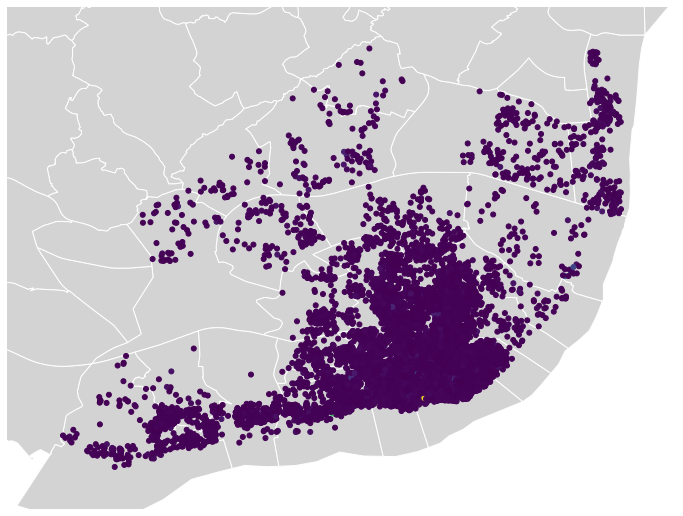

In [53]:
ax = geoplot.polyplot(hood, edgecolor='white', facecolor='lightgray', figsize=(12, 15))
geoplot.pointplot(gdf_lisboa, ax=ax, hue='price')

In [ ]:
def min_dist(point, point2):
    delta_x = point.x - point2.x
    delta_y = point.y - point2.y
    return 

In [54]:
linha_amarela = metro[metro.LINHA == 'Amarela']

,OBJECTID,NOME,COD_SIG,IDTIPO,SITUACAO,LINHA,GlobalID,geometry,color_eng
8,9,Rato,45,9008,Linha existente,Amarela,1b2fe3e2-0d2e-4f2b-bf10-4dac7fd88033,POINT (-9.15482 38.72027),red
13,14,Picoas,21,9008,Linha existente,Amarela,43759d29-70d9-4498-8d74-49601263efb5,POINT (-9.14700 38.73040),red
20,21,Campo Pequeno,17,9008,Linha existente,Amarela,96732259-7190-440a-9141-f4a916881bc6,POINT (-9.14670 38.74095),red
23,24,Entre Campos,16,9008,Linha existente,Amarela,23ab3dd2-e164-434c-851d-46575f088a93,POINT (-9.14820 38.74714),red
28,29,Cidade Universitária,27,9008,Linha existente,Amarela,323b2790-646a-4c8a-8ef8-f0e4d21d72bc,POINT (-9.15912 38.75160),red
41,42,Quinta das Conchas,2,9008,Linha existente,Amarela,7aa5f011-b676-496b-abcf-de0ec7808119,POINT (-9.15554 38.76748),red
44,45,Lumiar,46,9008,Linha existente,Amarela,5667b77f-3362-48d0-9237-402381f822cc,POINT (-9.15929 38.77328),red
47,48,Ameixoeira,1,9008,Linha existente,Amarela,478c7caf-231f-425e-9434-4ebdbcdd9c63,POINT (-9.15958 38.77961),red
48,49,Senhor Roubado,6,9008,Linha existente,Amarela,e2e36b19-d0aa-40b7-9124-28911182f859,POINT (-9.17168 38.78600),red
49,50,Odivelas,5,9008,Linha existente,Amarela,9d13e28e-31b7-46b1-8907-f271e7a469e3,POINT (-9.17315 38.79361),red


In [65]:
linha_amarela.geometry.x

8    -9.154824
13   -9.146997
20   -9.146698
23   -9.148196
28   -9.159124
41   -9.155535
44   -9.159289
47   -9.159583
48   -9.171682
49   -9.173155
dtype: float64